## CS 237 Homework 09 (Programming Problems) 

**Due Thursday April 7th at Midnight (1 minute after 11:59pm) in Gradescope (with grace period of 6 hours).
Homeworks may be submitted up to 24 hours late with a 10% penalty (same grace period).**

Enter your solutions in this notebook and submit as an IPYNB file on Gradescope. Don't forget to include information about your collaborators (or say **Collaborators: none**).


## Introduction

In this problem set, we will explore the practical side of the discrete distributions
we studied this week by creating functions to generate random values from the
appropriate distribution.  Such functions are useful when running random experiments, 
since these distributions are exceedingly common in practice. 

You will not use any source of randomness from `math` or `numpy`, but use
a variation of a hash function to create random integers. 

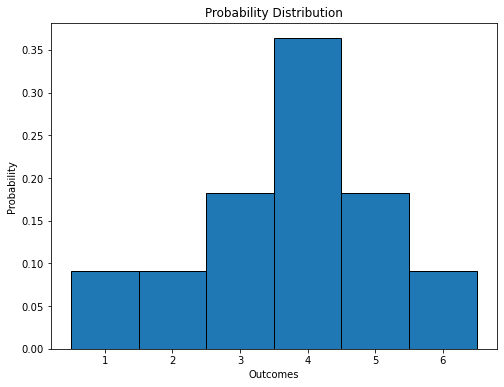

In [1]:
# Here are some imports which will be used in code that we write for CS 237

# Imports used for the code in CS 237

import numpy as np                # arrays and functions which operate on array
import matplotlib.pyplot as plt   # normal plotting

from collections import Counter

%matplotlib inline 


# This draws a useful bar chart for the distribution of the
# list of integers in outcomes

def show_distribution(outcomes, title='Probability Distribution', my_xticks = [], f_size = (8,6)):
    plt.figure(figsize=f_size)
    num_trials = len(outcomes)
    X = range( int(min(outcomes)), int(max(outcomes))+1 )
    freqs = Counter(outcomes)
    Y = [freqs[i]/num_trials for i in X]
    plt.bar(X,Y,width=1.0,edgecolor='black')
    if my_xticks != []:
        plt.xticks(X, my_xticks)
    elif (X[-1] - X[0] < 30):
        ticks = range(X[0],X[-1]+1)
        plt.xticks(ticks, ticks) 
    plt.xlabel("Outcomes")
    plt.ylabel("Probability")
    plt.title(title)
    plt.show()
    
# Example of use

show_distribution([1,4,3,5,4,6,2,4,3,5,4])
   


## Problem 1: Generating Random Floating-Point Numbers in [0..1)

In this problem we will investigate how to implement our own version of the <code>function random.random()</code>, which generates random 32-bit floating-point numbers in the range [0..1). 

<b>Hash functions</b> 
As you may recall from CS 112, hash functions map key values to buckets/bins in a hash table: the hash function appears to be spreading the keys uniformly randomly over the buckets, but in fact there is nothing random about it, since we can easily repeat the computation to find the key later. This is called <i>pseudo-random</i> behavior: the hash function is not random, but appears to be so unless you know the rule used to compute the hash function. 

The simplest hash functions use the linear-congruential method, which you may remember from CS 112 (Google it if you are unsure whether you studied this); using prime numbers as multiplier and modulus is a good (but not perfect) way to simulate random behavior. The particular choices we will use here are from <a href="http://www.ams.org/journals/mcom/1999-68-225/S0025-5718-99-00996-5/S0025-5718-99-00996-5.pdf"> this </a> paper. 

In [16]:
a = 914334          
m = 2**22 - 3
b = 37579

def hash(x):
    return ((a * x)+ 1) % m

# Test it!
X = [231,45,123,87,133,123]
for x in X:
    print(hash(x))
    

1496105
3396322
3411257
4049641
4165995
3411257


### Pseudo-random number generation (done for you!).
However, we want to generate a series of numbers which appear to be uniformly randomly distributed over the range $[0 \ldots m)$, and so we will start with a seed value and successively apply the hash function to generate a series of pseudo-random numbers $n_1$, $n_2$, $n_3$, etc.

Supposing that our initial "seed" value is 1, we would have:

$n_0 = \text{1}$

$n_1 = \text{hash(1)}$

$n_2 = \text{hash(hash(1))}$

...

$n_k = \text{hash}^{k}\text{(1)}$
</blockquote>

In [17]:
next_value = 1     # just to create the variable

# seed next_value with the hash of (n+1)
def my_seed(n):
    global next_value
    next_value = hash(n+1)# so values do not start with seed and are not 0       

# my_random_int() returns a random number generated by the hash function, in the range [0..(m-1)]. 

def my_random_int():
    global next_value
    next_value = hash(next_value)
    return next_value    
    
# Test it

my_seed(0)

for x in range(10):
    print(my_random_int())  
    

3696872
1170252
1452661
3850804
2467184
920025
1129791
319507
3048689
146430


###  (A) Your Turn: Generating Pseudo-random Floats.
We will now simulate <code>numpy.random()</code>, which produces floating-point values in the range [0..1). 

To do this, it is simply necessary to convert integers in the range $[0 .. m)$ returned by <code>my_random_int()</code> to floating point numbers in the range $[0..1).$

Print out 10 random floats to verify that your function works as expected. 

In [18]:
def my_random():
    global next_value
    next_value = my_random_int()
    return next_value/m# Your code here

x = 0
for x in range(20):
    print(my_random())
my_seed(0)

# Your code here
    

0.9154567113805137
0.196743629033777
0.3893092078990039
0.6452953662600753
0.4934142780882917
0.45054181852947606
0.7031035683895839
0.49810016019355785
0.9118706549672997
0.34343910940106587
0.0546553525843758
0.247150121080962
0.7588086787285891
0.5744568642069322
0.44247801957942456
0.6975543719919004
0.6791610807140451
0.06757383411443289
0.05404142430407355
0.9116498792051405


### (B)  Test it!

Now you must "eyeball" the correctness of `my_random()` by generating random points
from the unit square and displaying them. 

-  Let X be a list of  $10^4$ floats generated using `my_random()`
-  Let Y be another list of  $10^4$ floats generated using `my_random()`
-  Display the points (x,y) using `plt.scatter`
-  They should be randomly distributed over the unit square, similar to this:

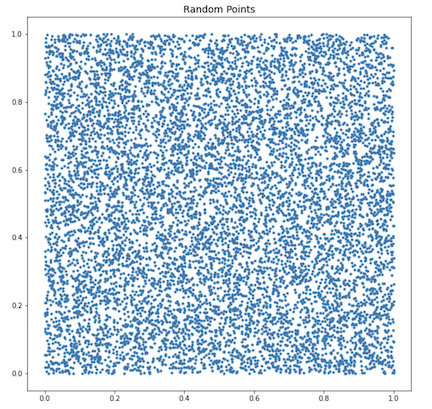
 

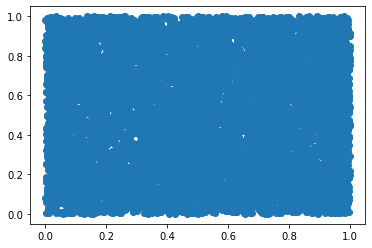

In [21]:
import numpy as np                # arrays and functions which operate on array
import matplotlib.pyplot as plt
my_seed(0)
X = []
Y = []
i = 0
for i in range(10**4):
    X.append(my_random())
    Y.append(my_random())
    
print(plt.scatter(X,Y))

# Your code here

## Problem 2:  Generating values from Bernoulli, Uniform,  and Binomial Distributions 

For this problem, you will use the `my_random()` function to create functions to generate
random values from the three discrete distributions we studied this week. 


### Part (A)  Bernoulli

Complete the following template to generate values from a Bernoulli(p) distribution, 
and test it using $p=0.25$. 

In [6]:
#  Generate random 1's and 0's using my_random()


def getBernoulli(p):
    pass                   # Your code here
    
# Test:  find the average of $10^5$ outcomes from getBernoulli(0.25) and
#        verify that it is approximately 0.25

my_seed(0)

# Your code here

## Part (B) Uniform Discrete

Complete the following template to generate values from a uniform discrete distribution. 

NOTE:  We will follow the convention used in the lecture, where `b` is an **inclusive** bound,
that is, x = Uniform(a,b) means  $a\le x\le b$. 

Hint: You should to generate a float in the appropriate range and truncate by converting to an int. 

In [7]:
#  Generate random integers in range [a, ..., b] using my_random()

def getUniform(a,b):
    pass               # Your code here
    
# Test:  Generate 10**5 variates with getUniform(3,21) and display using show_distribution;
#        they should be approximately uniformly distributed

my_seed(0)

# Your code here

## Part (C) Binomial

Complete the following template to generate values from a Binomial(N,p) distribution
and display the distribution of $10^5$ numbers from Binomial(20,0.5) to test it. 


Hint: Use your definition of `getBernoulli(p)`. 

In [8]:

def getBinomial(N,p):
    pass                     # Your code here


# Test:  Generate 10**5 variates with getBinomial(20,0.5) and display using show_distribution;
#        it should look like the example at the end of lecture on March 31st. 

my_seed(0)

# Your code here